# Predicting Pulsar Star

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d colearninglounge/predicting-pulsar-starintermediate

Dataset URL: https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate
License(s): CC-BY-NC-SA-4.0


100%|█████████████████████████████████████████| 790k/790k [00:01<00:00, 534kB/s]
100%|█████████████████████████████████████████| 790k/790k [00:01<00:00, 533kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile("/home/bhxveshhh/ML/Predicting Pulsar Star/predicting-pulsar-starintermediate.zip", 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Predicting Pulsar Star')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_train = pd.read_csv("pulsar_data_train.csv")
df_test = pd.read_csv("pulsar_data_test.csv")

In [6]:
# concating train and test data

df = pd.concat([df_train, df_test], axis=0)

In [16]:
df = df.head(5000)

In [17]:
df.shape

(5000, 9)

In [18]:
df.size

45000

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5000 non-null   float64
 1    Standard deviation of the integrated profile  5000 non-null   float64
 2    Excess kurtosis of the integrated profile     4316 non-null   float64
 3    Skewness of the integrated profile            5000 non-null   float64
 4    Mean of the DM-SNR curve                      5000 non-null   float64
 5    Standard deviation of the DM-SNR curve        4535 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5000 non-null   float64
 7    Skewness of the DM-SNR curve                  4746 non-null   float64
 8   target_class                                   5000 non-null   float64
dtypes: float64(9)
memory usage: 390.6 KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,5000.0,111.157033,25.627930,6.414062,101.000000,115.242188,127.269531,185.257812
Standard deviation of the integrated profile,5000.0,46.512201,6.691953,25.695250,42.394421,46.941796,50.907744,90.250557
Excess kurtosis of the integrated profile,4316.0,0.469182,1.042074,-1.738021,0.019940,0.220407,0.473277,8.069522
Skewness of the integrated profile,5000.0,1.733719,6.005168,-1.668540,-0.187444,0.201661,0.944638,68.101622
Mean of the DM-SNR curve,5000.0,12.560876,29.561935,0.213211,1.903637,2.765468,5.375627,222.421405
Standard deviation of the DM-SNR curve,4535.0,26.253266,19.659942,7.370432,14.356150,18.284811,28.083699,110.642211
Excess kurtosis of the DM-SNR curve,5000.0,8.372525,4.573628,-3.139270,5.829172,8.510665,10.741640,34.539844
Skewness of the DM-SNR curve,4746.0,106.502952,109.037542,-1.976976,35.614749,84.376026,140.193201,1191.000837
target_class,5000.0,0.092400,0.289619,0.000000,0.000000,0.000000,0.000000,1.000000


In [21]:
df.isnull().sum()

 Mean of the integrated profile                    0
 Standard deviation of the integrated profile      0
 Excess kurtosis of the integrated profile       684
 Skewness of the integrated profile                0
 Mean of the DM-SNR curve                          0
 Standard deviation of the DM-SNR curve          465
 Excess kurtosis of the DM-SNR curve               0
 Skewness of the DM-SNR curve                    254
target_class                                       0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.nunique()

 Mean of the integrated profile                  3911
 Standard deviation of the integrated profile    4996
 Excess kurtosis of the integrated profile       4316
 Skewness of the integrated profile              5000
 Mean of the DM-SNR curve                        3788
 Standard deviation of the DM-SNR curve          4535
 Excess kurtosis of the DM-SNR curve             5000
 Skewness of the DM-SNR curve                    4746
target_class                                        2
dtype: int64

In [24]:
df['target_class'].value_counts()

target_class
0.0    4538
1.0     462
Name: count, dtype: int64

## Data Visualization

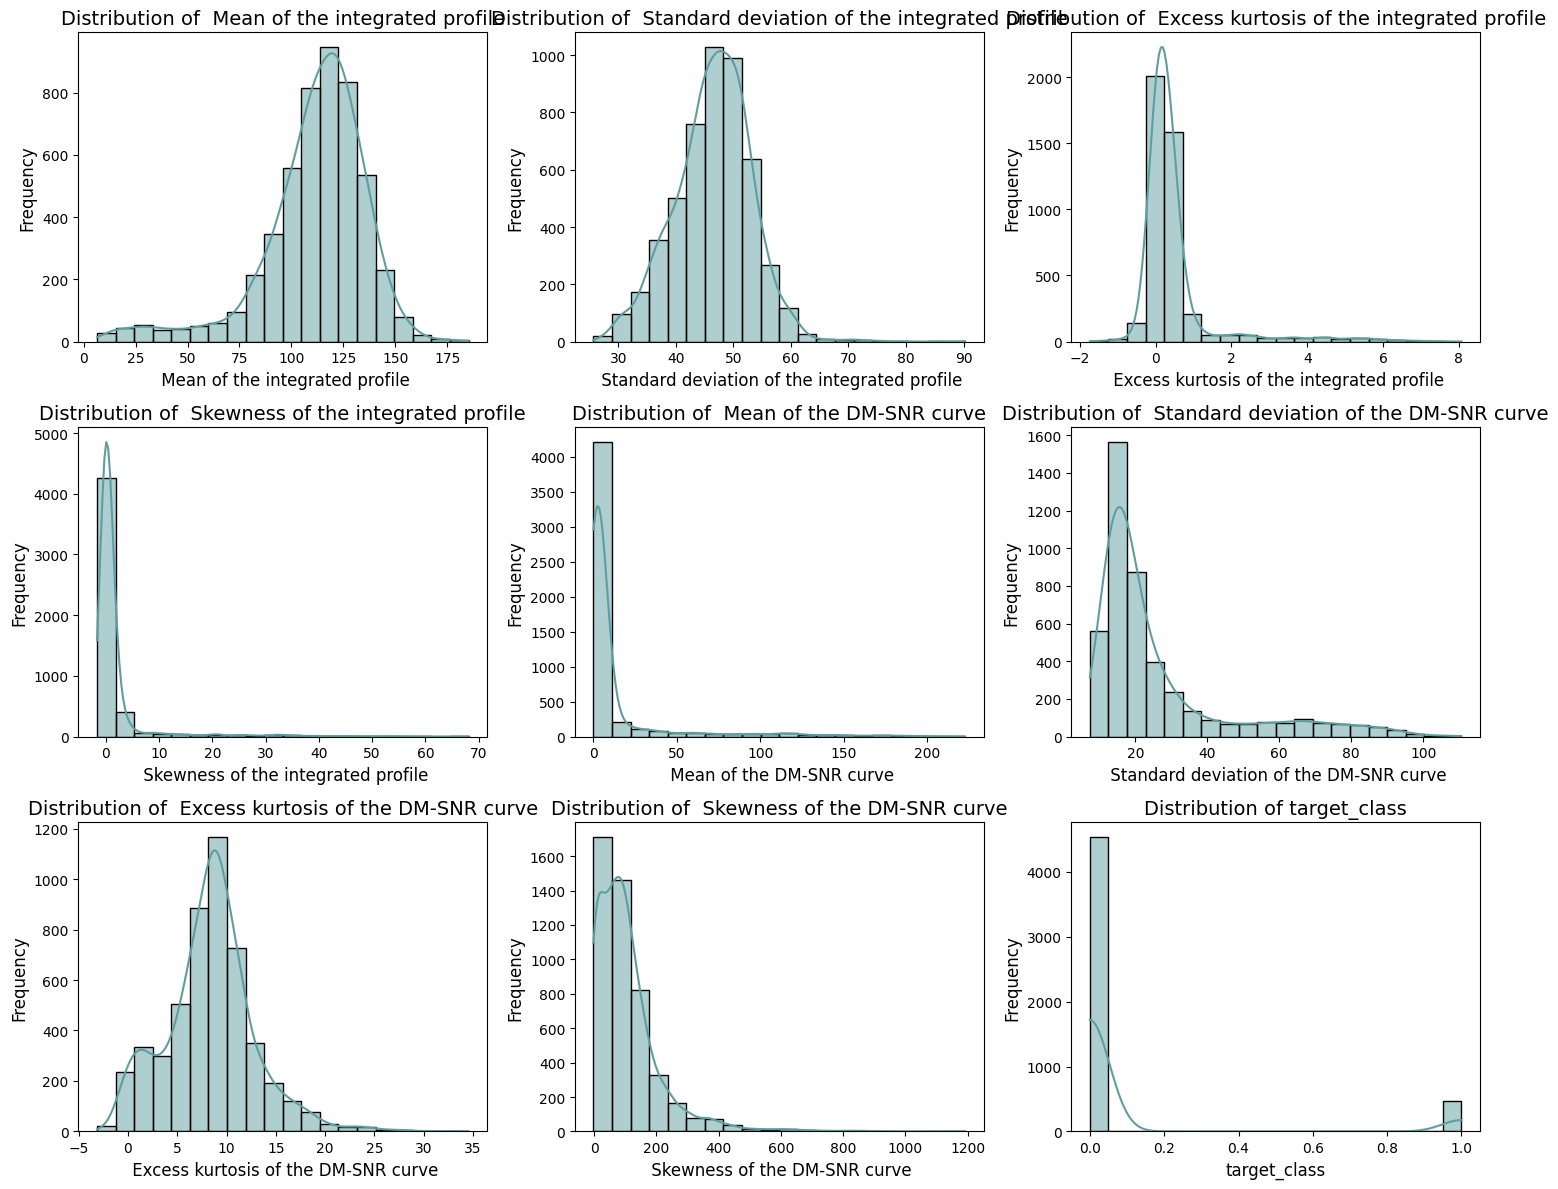

In [25]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

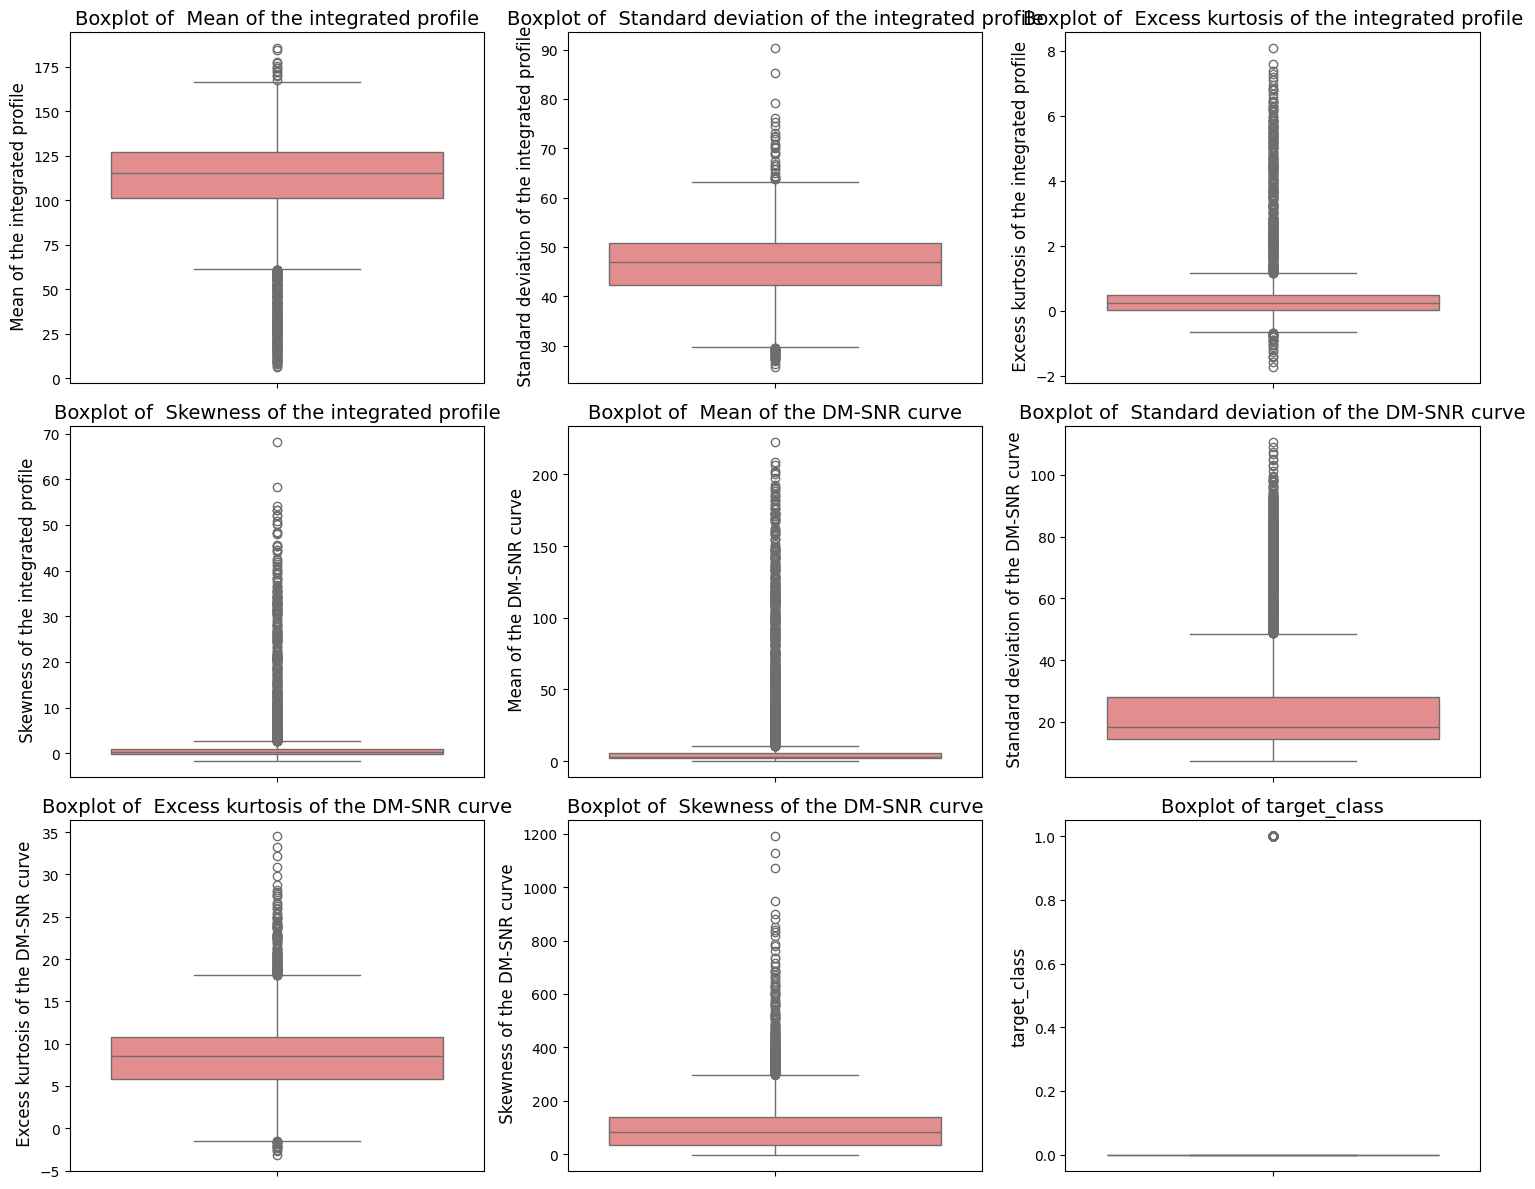

In [26]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

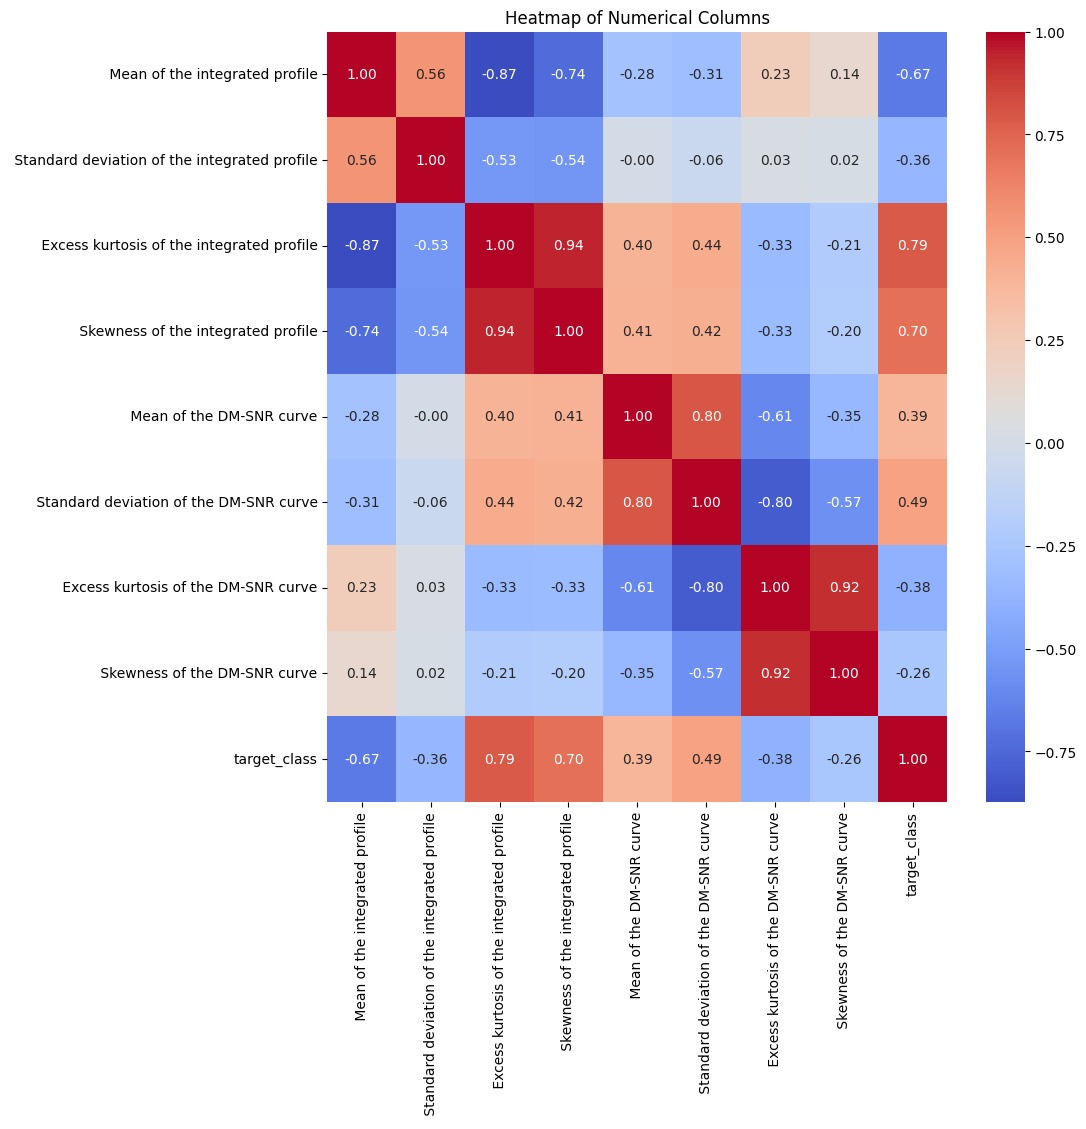

In [27]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [28]:
# filling null values with mean 

df.fillna(df.mean(), inplace=True)

In [29]:
X = df.drop(columns=['target_class'])
y = df['target_class']

In [30]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Training

In [33]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [35]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.963, 0.96, 0.966, 0.97, 0.933, 0.966, 0.96, 0.943, 0.974]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       913
         1.0       0.74      0.89      0.81        87

    accuracy                           0.96      1000
   macro avg       0.86      0.93      0.89      1000
weighted avg       0.97      0.96      0.96      1000

Confusion Matrix:
 [[886  27]
 [ 10  77]]


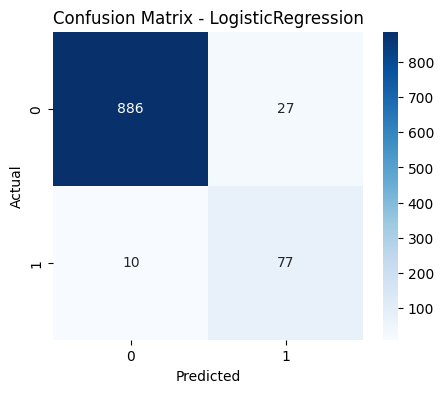

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       913
         1.0       0.72      0.87      0.79        87

    accuracy                           0.96      1000
   macro avg       0.86      0.92      0.88      1000
weighted avg       0.96      0.96      0.96      1000

Confusion Matrix:
 [[884  29]
 [ 11  76]]


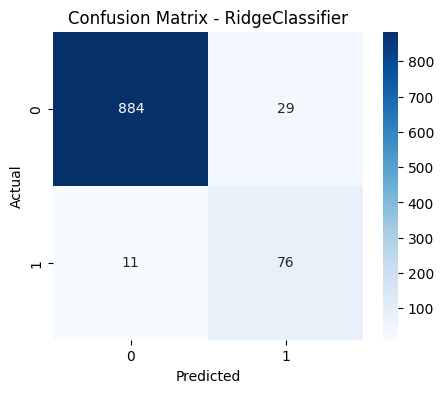

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       913
         1.0       0.76      0.89      0.82        87

    accuracy                           0.97      1000
   macro avg       0.88      0.93      0.90      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[889  24]
 [ 10  77]]


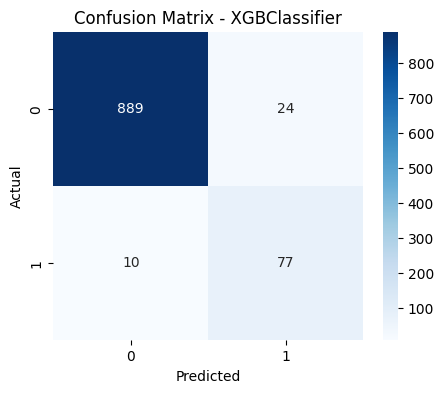

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       913
         1.0       0.85      0.84      0.84        87

    accuracy                           0.97      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[900  13]
 [ 14  73]]


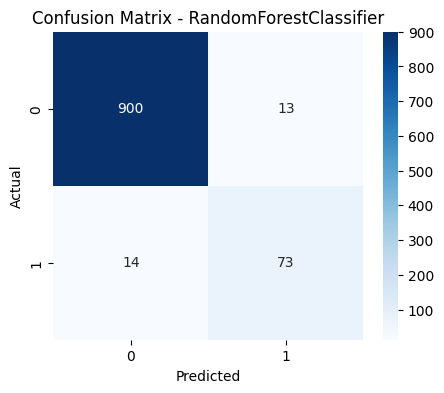

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       913
         1.0       0.57      0.95      0.71        87

    accuracy                           0.93      1000
   macro avg       0.78      0.94      0.84      1000
weighted avg       0.96      0.93      0.94      1000

Confusion Matrix:
 [[850  63]
 [  4  83]]


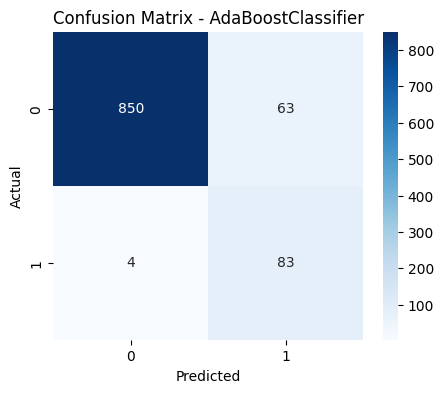

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       913
         1.0       0.77      0.87      0.82        87

    accuracy                           0.97      1000
   macro avg       0.88      0.92      0.90      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[890  23]
 [ 11  76]]


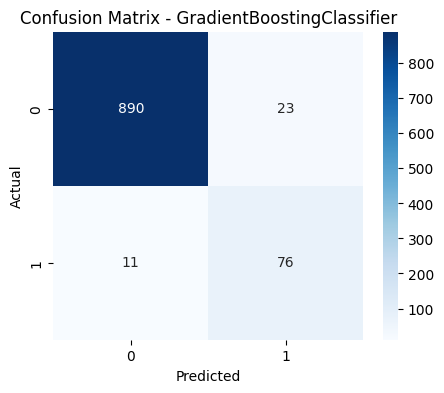

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       913
         1.0       0.81      0.82      0.81        87

    accuracy                           0.97      1000
   macro avg       0.89      0.90      0.90      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[896  17]
 [ 16  71]]


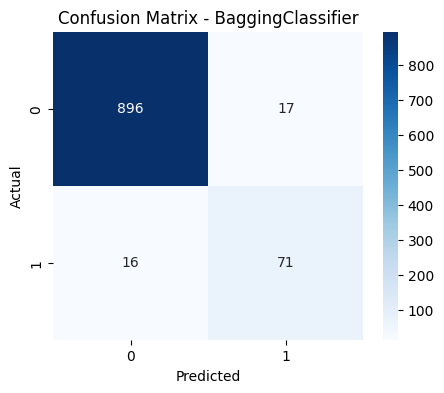

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       913
         1.0       0.60      0.82      0.69        87

    accuracy                           0.94      1000
   macro avg       0.79      0.88      0.83      1000
weighted avg       0.95      0.94      0.94      1000

Confusion Matrix:
 [[866  47]
 [ 16  71]]


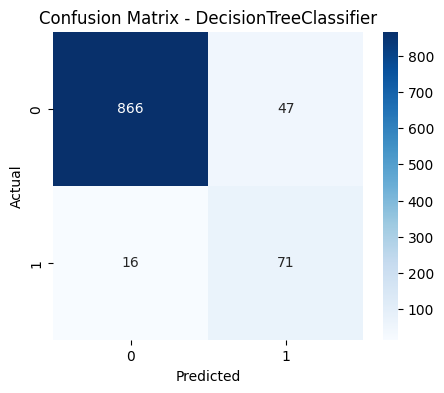

Model: SVC
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       913
         1.0       0.84      0.86      0.85        87

    accuracy                           0.97      1000
   macro avg       0.91      0.92      0.92      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[899  14]
 [ 12  75]]


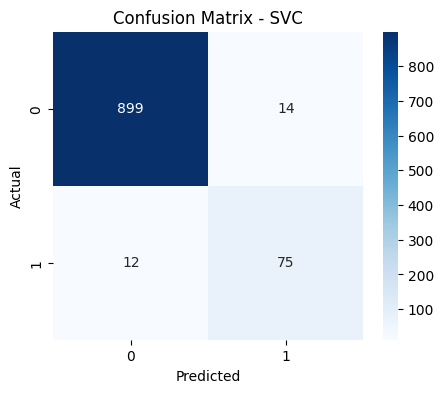

In [36]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()